# EDA

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PROCESSED_DATA_DIR = Path("data/processing_checkpoint")
checkpoint_file_path = PROCESSED_DATA_DIR / "02_engineered_train.parquet"

In [3]:
df_engineered_churn = pd.read_parquet(checkpoint_file_path)

In [4]:
df_engineered_churn.sample(5)

,gender,registration,operating_system,browser,metropolitan_area,region,num_unique_artists,count_about,count_add_friend,count_add_to_playlist,...,last_time,user_lifecycle_h,ttl_length,item_per_session,frequency,avg_songs_session,thumbs_ratio,errors_per_session,ads_per_session,last_level
userId,,,,,,,,,,,,,,,,,,,,,
1260736,M,2018-09-17 15:19:57,Macintosh,Chrome,Phoenix-Mesa-Scottsdale,AZ,820,2,11,32,...,2018-11-19 07:13:08,1503.886389,266067.90207,66.545455,0.007314,94.909091,0.803030,0.000000,1.818182,free
1017992,F,2018-09-05 02:59:47,Windows,Chrome,Boston-Cambridge-Newton,MA-NH,185,1,1,2,...,2018-10-03 00:15:35,669.263333,49520.91685,41.666667,0.004483,65.333333,0.857143,0.000000,0.666667,paid
1211189,F,2018-07-30 13:27:36,Macintosh,Safari,Oklahoma City,OK,518,2,8,18,...,2018-11-14 19:07:51,2573.670833,152335.58209,25.666667,0.003497,67.222222,0.809524,0.000000,4.222222,paid
1302038,M,2018-07-29 13:43:18,Macintosh,Chrome,Cincinnati,OH-KY-IN,1798,12,68,78,...,2018-11-19 23:56:29,2722.219722,726376.73403,10.166667,0.013225,81.055556,0.854839,0.111111,0.805556,paid
1394218,M,2018-07-29 23:09:07,Windows,Edge,Easton,MD,344,2,5,6,...,2018-11-16 23:39:33,2640.507222,97017.55733,47.200000,0.001894,76.400000,0.636364,0.200000,0.600000,paid


In [5]:
df_engineered_churn.columns

Index(['gender', 'registration', 'operating_system', 'browser',
       'metropolitan_area', 'region', 'num_unique_artists', 'count_about',
       'count_add_friend', 'count_add_to_playlist', 'count_cancel',
       'churn_label', 'count_downgrade', 'count_error', 'count_help',
       'count_home', 'count_logout', 'count_nextsong', 'count_roll_advert',
       'count_save_settings', 'count_settings', 'count_submit_downgrade',
       'count_submit_upgrade', 'count_thumbs_down', 'count_thumbs_up',
       'count_upgrade', 'count_total_sessions', 'last_time',
       'user_lifecycle_h', 'ttl_length', 'item_per_session', 'frequency',
       'avg_songs_session', 'thumbs_ratio', 'errors_per_session',
       'ads_per_session', 'last_level'],
      dtype='object')

In [6]:
df_engineered_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19140 entries, 1749042 to 1142609
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  19140 non-null  category      
 1   registration            19140 non-null  datetime64[us]
 2   operating_system        19140 non-null  category      
 3   browser                 19140 non-null  category      
 4   metropolitan_area       19140 non-null  category      
 5   region                  19140 non-null  category      
 6   num_unique_artists      19140 non-null  int64         
 7   count_about             19140 non-null  int64         
 8   count_add_friend        19140 non-null  int64         
 9   count_add_to_playlist   19140 non-null  int64         
 10  count_cancel            19140 non-null  int64         
 11  churn_label             19140 non-null  int64         
 12  count_downgrade         19140 non-null  int

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

In [8]:
target_variable = "churn_label"

In [9]:
churn_counts = df_engineered_churn[target_variable].value_counts()
churn_percentages = (churn_counts / len(df_engineered_churn)) * 100

<Axes: xlabel='churn_label', ylabel='count'>

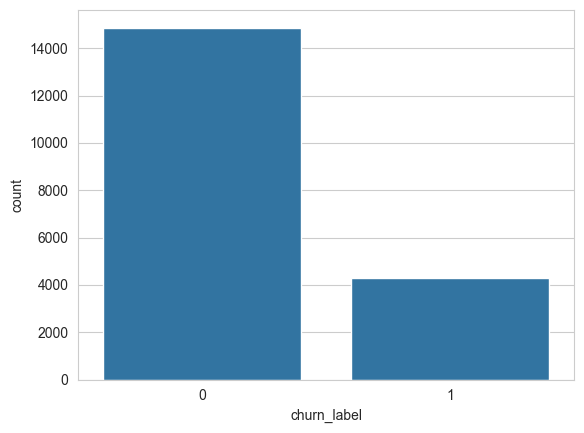

In [10]:
sns.countplot(x=target_variable, data=df_engineered_churn)

/var/folders/sl/v_vwt6ws11v1w46b948l2dhw0000gn/T/ipykernel_84093/4183652013.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_gender = df_engineered_churn.groupby("gender")[target_variable].mean().reset_index()


<Axes: xlabel='gender', ylabel='churn_label'>

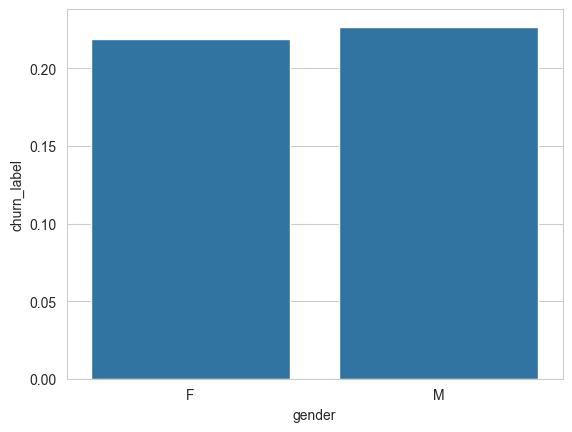

In [11]:
churn_gender = df_engineered_churn.groupby("gender")[target_variable].mean().reset_index()
sns.barplot(x="gender", y=target_variable, data=churn_gender)

/var/folders/sl/v_vwt6ws11v1w46b948l2dhw0000gn/T/ipykernel_84093/1641042037.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_gender = df_engineered_churn.groupby("operating_system")[target_variable].mean().reset_index()


<Axes: xlabel='operating_system', ylabel='churn_label'>

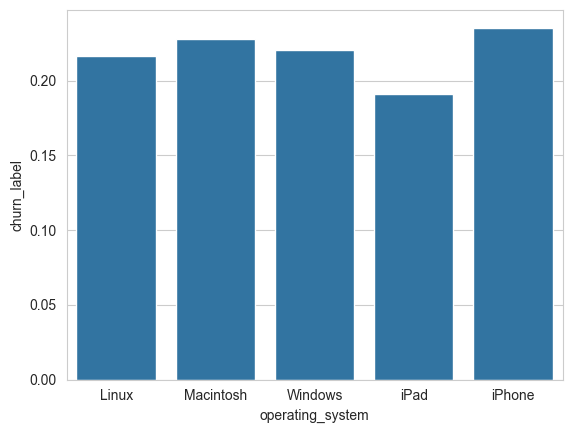

In [12]:
churn_gender = df_engineered_churn.groupby("operating_system")[target_variable].mean().reset_index()
sns.barplot(x="operating_system", y=target_variable, data=churn_gender)

/var/folders/sl/v_vwt6ws11v1w46b948l2dhw0000gn/T/ipykernel_84093/417350370.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_gender = df_engineered_churn.groupby("browser")[target_variable].mean().reset_index()


<Axes: xlabel='browser', ylabel='churn_label'>

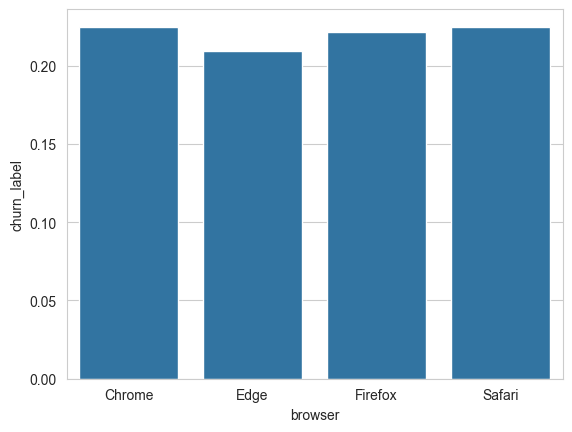

In [13]:
churn_gender = df_engineered_churn.groupby("browser")[target_variable].mean().reset_index()
sns.barplot(x="browser", y=target_variable, data=churn_gender)

/var/folders/sl/v_vwt6ws11v1w46b948l2dhw0000gn/T/ipykernel_84093/2141827567.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_gender = df_engineered_churn.groupby("last_level")[target_variable].mean().reset_index()


<Axes: xlabel='last_level', ylabel='churn_label'>

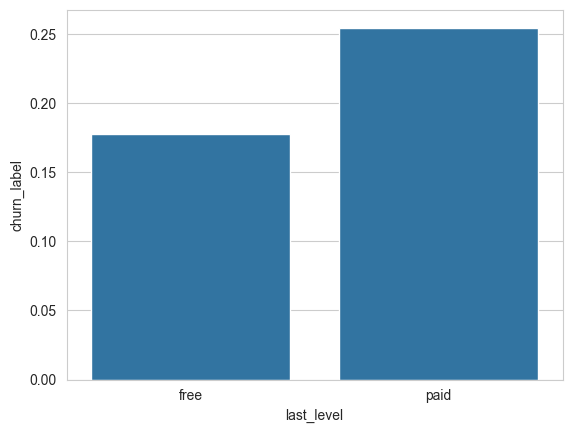

In [14]:
churn_gender = df_engineered_churn.groupby("last_level")[target_variable].mean().reset_index()
sns.barplot(x="last_level", y=target_variable, data=churn_gender)

<Axes: xlabel='churn_label', ylabel='user_lifecycle_h'>

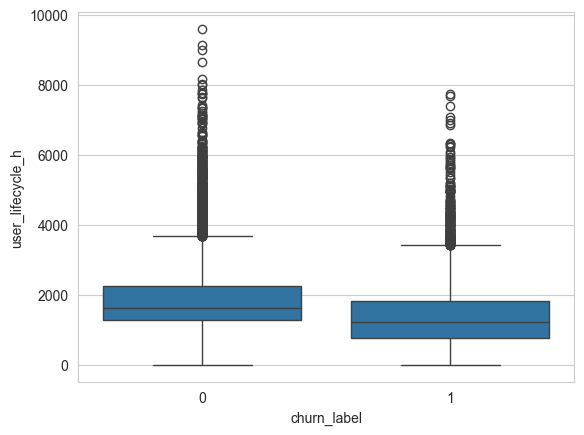

In [15]:
sns.boxplot(x=target_variable, y="user_lifecycle_h", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='avg_songs_session'>

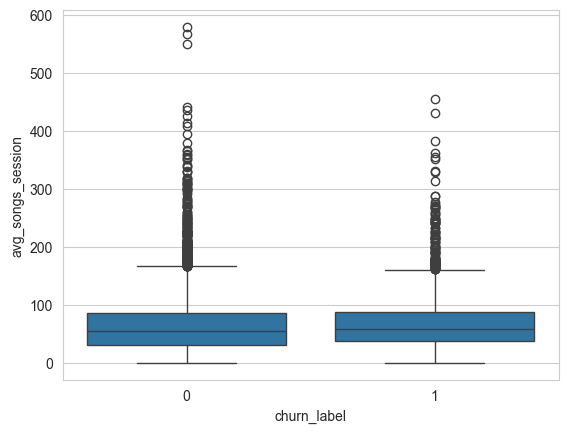

In [16]:
sns.boxplot(x=target_variable, y="avg_songs_session", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='ads_per_session'>

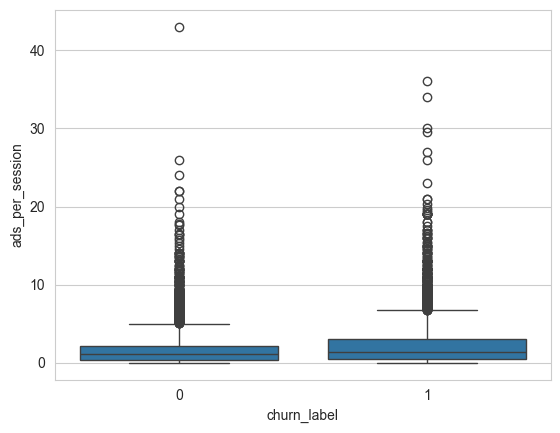

In [17]:
sns.boxplot(x=target_variable, y="ads_per_session", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='errors_per_session'>

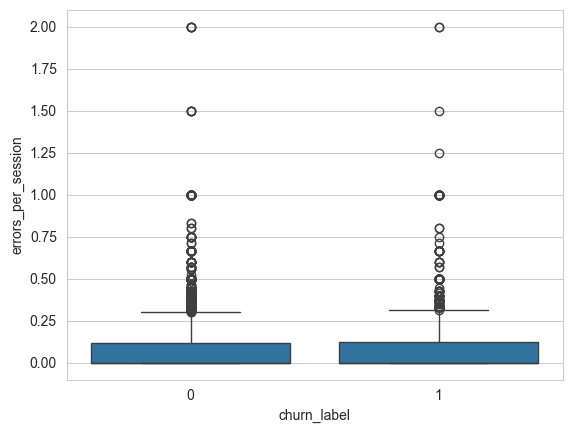

In [18]:
sns.boxplot(x=target_variable, y="errors_per_session", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='thumbs_ratio'>

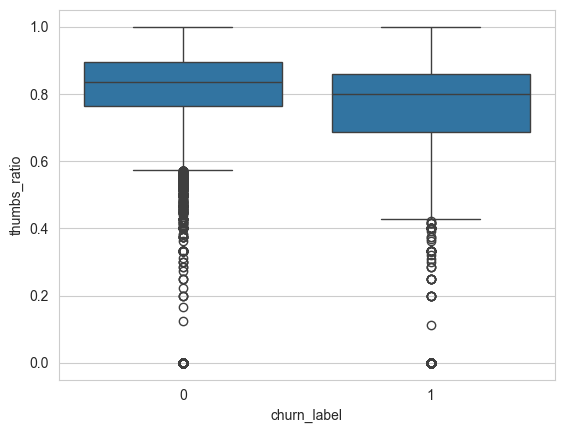

In [19]:
sns.boxplot(x=target_variable, y="thumbs_ratio", data=df_engineered_churn)

In [20]:
# import ydata_profiling
# df_engineered_churn.profile_report()

In [21]:
# from skrub import TableReport
# TableReport(df_engineered_churn)

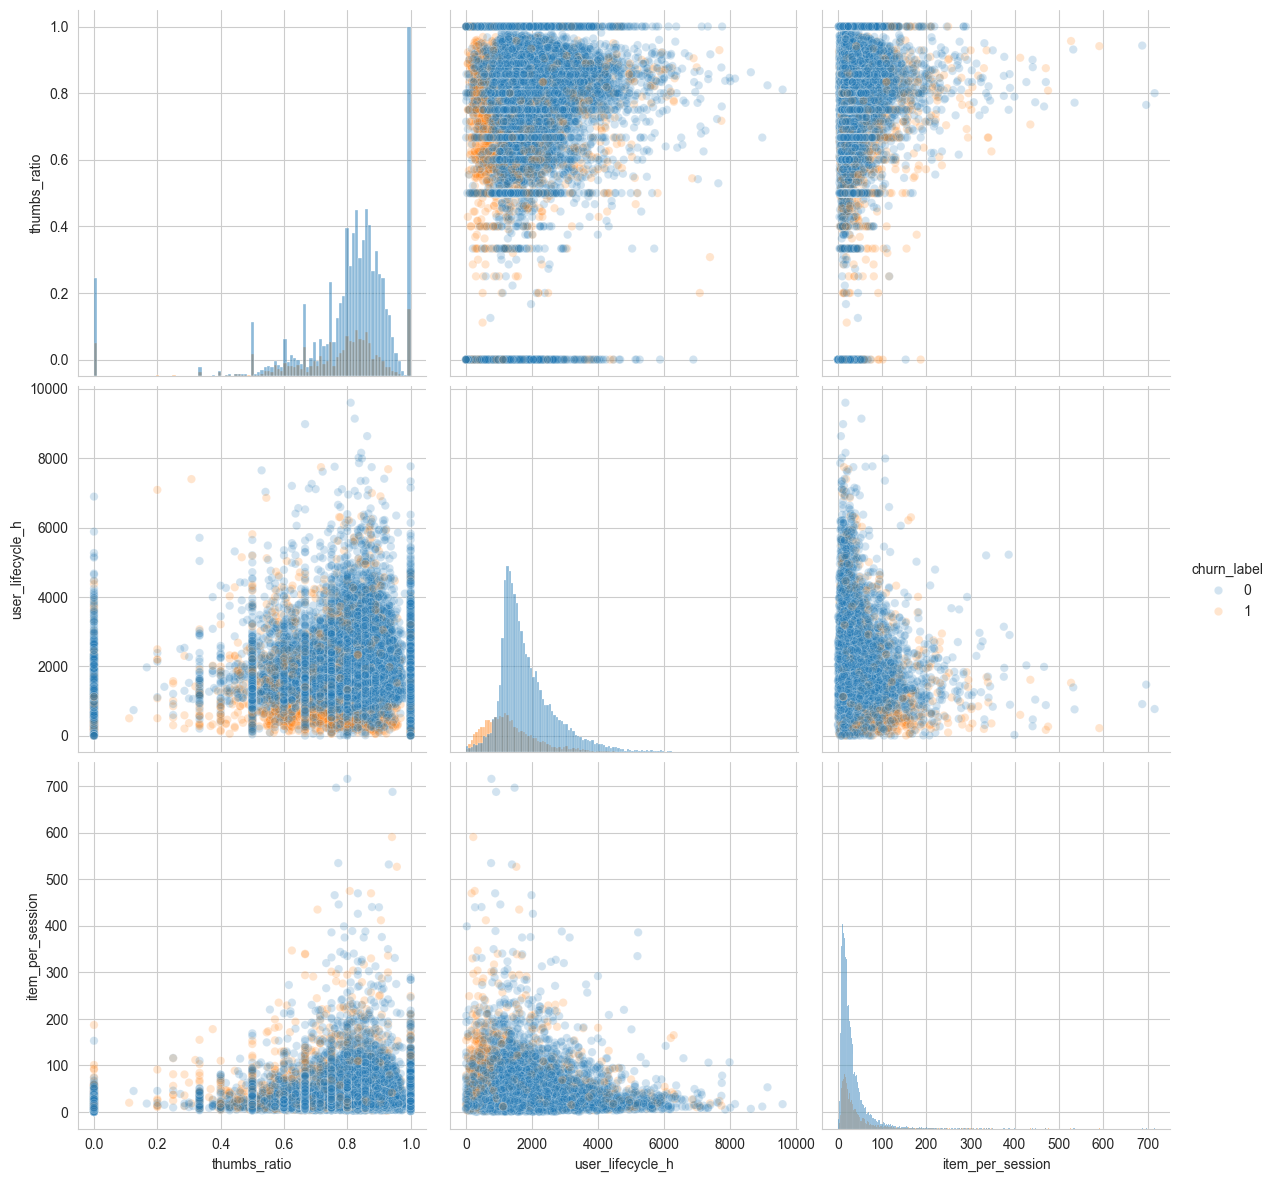

In [22]:
columns = ['thumbs_ratio', 'user_lifecycle_h', 'item_per_session']
sns.pairplot(data=df_engineered_churn, vars=columns,
             hue=target_variable, plot_kws={'alpha': 0.2}, height=4,
             diag_kind='hist')

<Axes: >

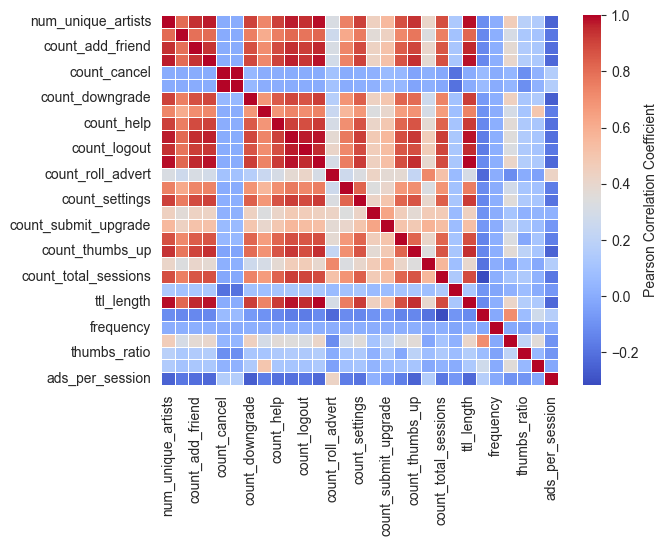

In [26]:
numerical_df = df_engineered_churn.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
sns.heatmap(
    corr_matrix, 
    annot=False, # Set to True to display values, but often too cluttered for this many features
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)

<Axes: xlabel='churn_label', ylabel='num_unique_artists'>

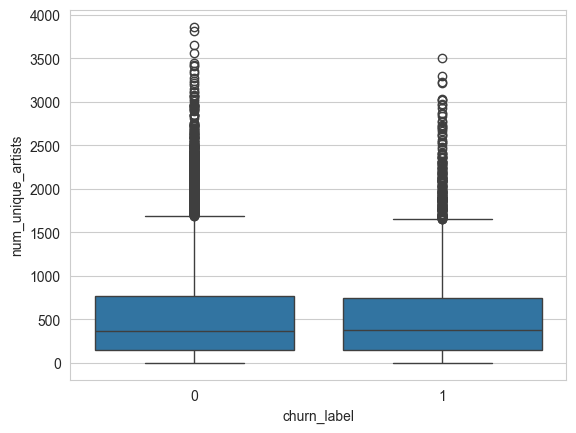

In [27]:
sns.boxplot(x=target_variable, y="num_unique_artists", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='ttl_length'>

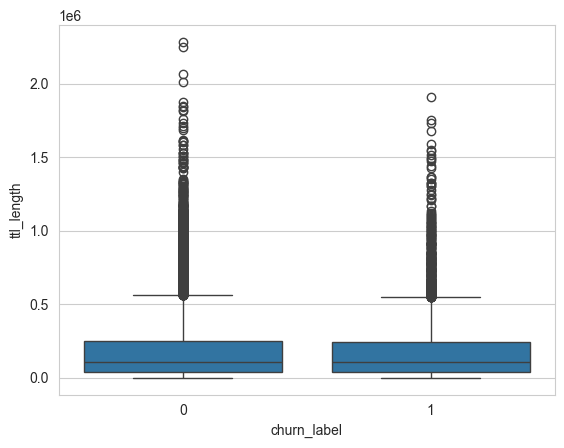

In [28]:
sns.boxplot(x=target_variable, y="ttl_length", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='count_cancel'>

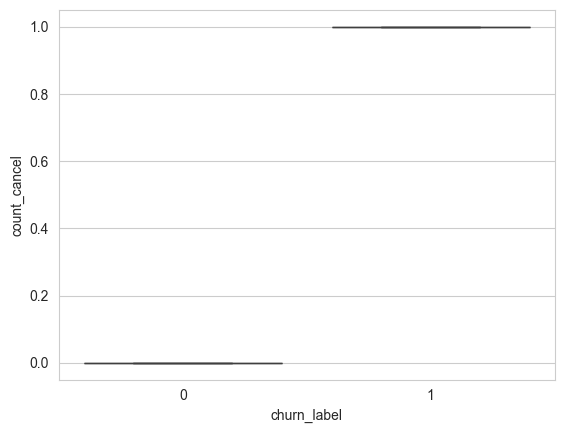

In [29]:
sns.boxplot(x=target_variable, y="count_cancel", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='count_add_friend'>

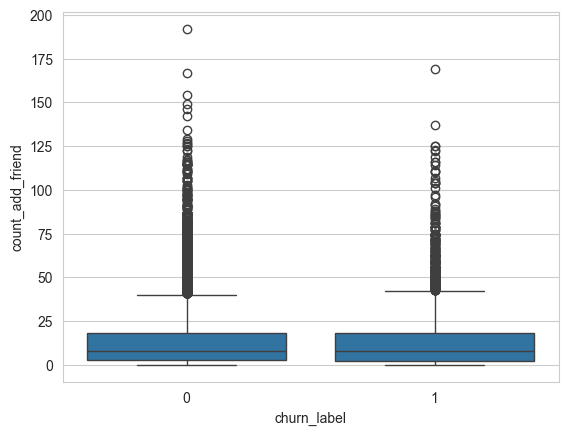

In [31]:
sns.boxplot(x=target_variable, y="count_add_friend", data=df_engineered_churn)

<Axes: xlabel='churn_label', ylabel='count_add_to_playlist'>

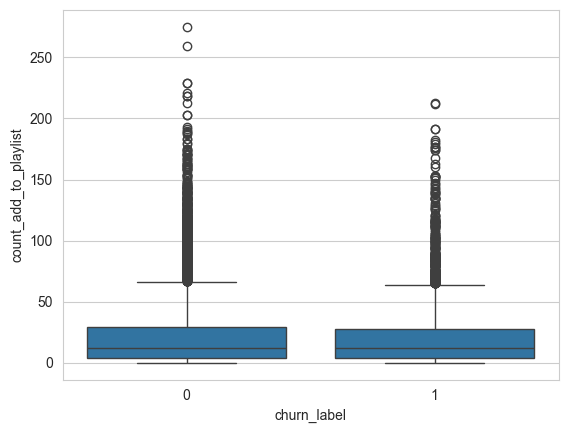

In [32]:
sns.boxplot(x=target_variable, y="count_add_to_playlist", data=df_engineered_churn)

/var/folders/sl/v_vwt6ws11v1w46b948l2dhw0000gn/T/ipykernel_84093/1209207206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_region = df_engineered_churn.groupby("region")[target_variable].mean().reset_index()


<Axes: xlabel='region', ylabel='churn_label'>

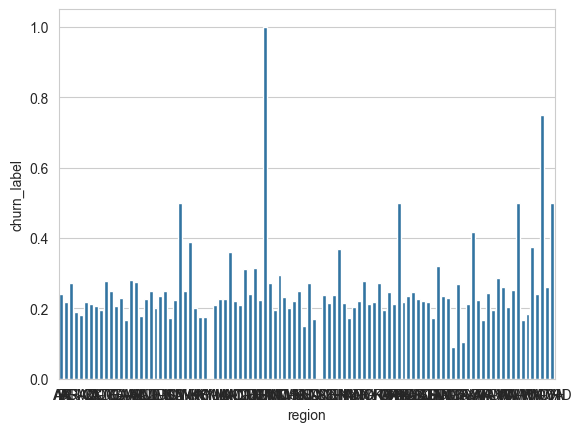

In [43]:
churn_region = df_engineered_churn.groupby("region")[target_variable].mean().reset_index()
sns.barplot(x="region", y=target_variable, data=churn_region)

In [47]:
churn_region[churn_region[target_variable] > 0.3]

,region,churn_label
24,IL-MO,0.500000
26,IN-KY,0.388889
34,MA-CT,0.360000
37,MD-DE,0.310345
39,ME,0.313725
41,MI-WI,1.000000
56,NH,0.368421
68,OR-ID,0.500000
76,SD,0.319149
83,TX-AR,0.416667


In [49]:
df_engineered_churn[df_engineered_churn["region"] == "IL-MO"]

,gender,registration,operating_system,browser,metropolitan_area,region,num_unique_artists,count_about,count_add_friend,count_add_to_playlist,...,last_time,user_lifecycle_h,ttl_length,item_per_session,frequency,avg_songs_session,thumbs_ratio,errors_per_session,ads_per_session,last_level
userId,,,,,,,,,,,,,,,,,,,,,
1133704,F,2018-08-25 17:23:33,Windows,Edge,Quincy,IL-MO,1019,2,40,45,...,2018-10-21 01:23:44,1352.003056,348295.95861,41.368421,0.014053,73.789474,0.841584,0.105263,1.578947,paid
1462828,M,2018-09-17 12:24:03,Linux,Chrome,Quincy,IL-MO,366,1,12,14,...,2018-11-19 17:02:13,1516.636111,106201.64058,17.555556,0.005934,47.666667,0.800000,0.111111,1.777778,paid
